# Mixture Models

One common objective is to find similarities in data and cluster it. There are several heuristic methods to cluster them. We are going to focus on a few strongly theoretically motivated methods. Other methods use heuristics to identify similarities in data and are mentioned in the end.

For the purposes of this example, we will generate a fake dataset.

We start by loading the necessary Python modules. If you have not yet installed them, run the following cell to install them with pip:

In [3]:
!pip install numpy scikit-learn pandas matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

Let's generate the fake data now to have something to cluster.

In [30]:
def generate_clusters(mu: np.ndarray, sigma: np.ndarray, N: int) ->np.ndarray:
    assert len(mu) == len(sigma)
    assert N > 1
    D = len(mu[0].shape)
    data = np.concatenate([np.random.default_rng().multivariate_normal(mean=mu_k, cov=sigma_k, size=N)
                           for mu_k, sigma_k in zip(mu, sigma)], axis=0)
    source = np.concatenate([k*np.ones([N, 1]) for k in range(len(mu))], axis=0)
    return np.concatenate([data, source], axis=1)


In [37]:
data = generate_clusters(mu=[np.array([5.0, -2.0]),
                             np.array([1.0, 5.0]),
                             np.array([-5.0, -1.0])],
                         sigma=[np.array([[0.1, 0.2],
                                          [0.2, 0.1]]),
                                np.array([[1.0, 0.5],
                                          [0.5, 1.0]]),
                                np.array([[2.0, 0.0],
                                          [0.0, 5.0]])],
                         N=1000)
data = pd.DataFrame(data, columns=["x", "y", "source"])

/home/danilo/miniconda3/envs/mlmkl/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


Let's print out the dataset read first.

In [38]:
data

x         y  source
0     4.534476 -2.320879     0.0
1     5.152923 -2.933233     0.0
2     4.534167 -2.189752     0.0
3     5.053339 -2.170888     0.0
4     4.897417 -2.134055     0.0
...        ...       ...     ...
2995 -3.254170 -2.961716     2.0
2996 -3.062829 -5.258342     2.0
2997 -6.158200 -4.171855     2.0
2998 -4.484679  1.311242     2.0
2999 -5.361504 -4.537926     2.0

[3000 rows x 3 columns]

We can plot this fairly easily using Matplotlib.

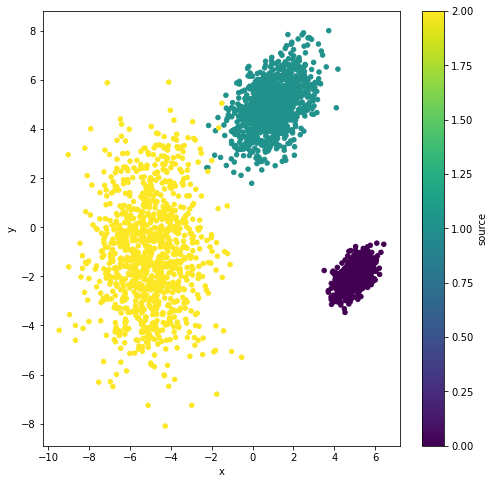

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
data.plot.scatter(x="x", y="y", c="source", colormap='viridis', ax=ax)
ax.set(xlabel="x", ylabel=r"y", title="")
plt.show()

In [41]:
gmm = GaussianMixture(n_components=3, covariance_type="full", max_iter=20)

In [42]:
gmm.fit(data.loc[:, ["x", "y"]])

GaussianMixture(max_iter=20, n_components=3)

In [44]:
guess = gmm.predict(data.loc[:, ["x", "y"]])

In [45]:
data.loc[:, "guess"] = guess

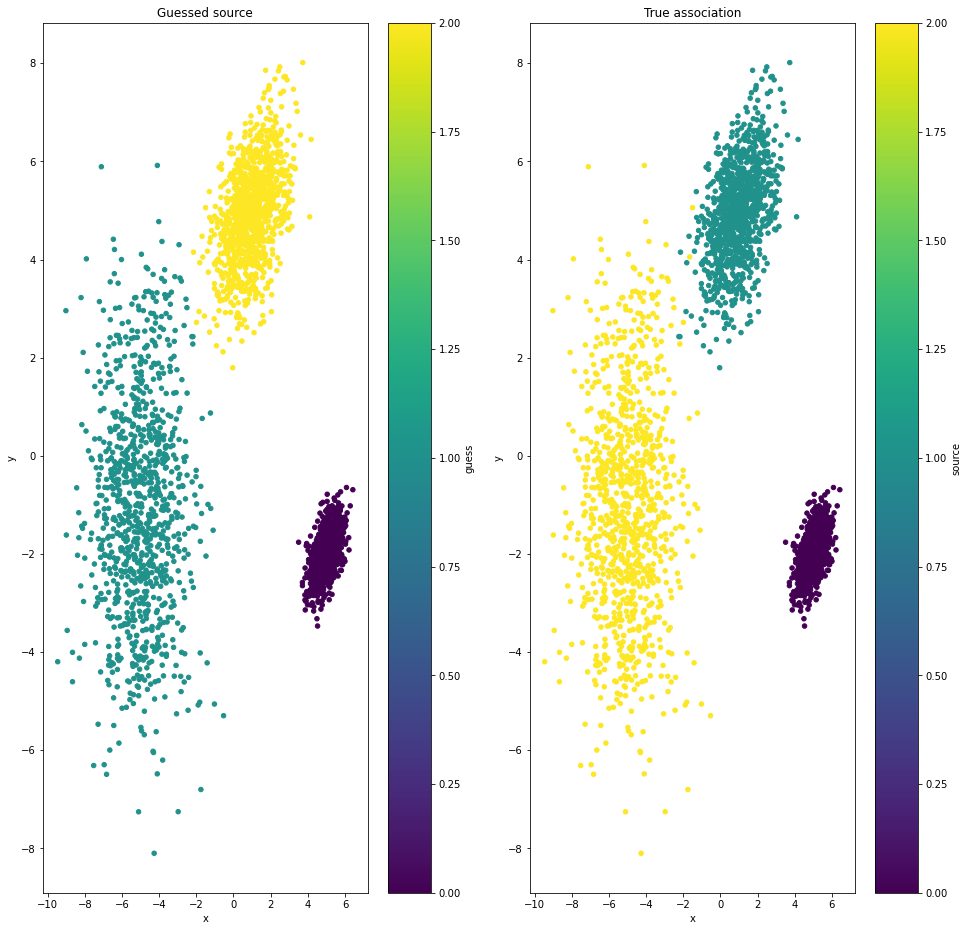

In [46]:
fig, ax = plt.subplots(figsize=(16, 16), ncols=2)
data.plot.scatter(x="x", y="y", c="guess", colormap='viridis', ax=ax[0])
data.plot.scatter(x="x", y="y", c="source", colormap='viridis', ax=ax[1])
ax[0].set(xlabel="x", ylabel=r"y", title="Guessed source")
ax[1].set(xlabel="x", ylabel=r"y", title="True association")
plt.show()